In [1]:
#from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [2]:
df=pd.read_csv('data-2.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df=df.drop('Unnamed: 32', axis=1)

In [5]:
df['diagnosis'] = (df['diagnosis']=='M').astype('int')

In [6]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
df.shape

(569, 32)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [9]:
df_copy=df.copy(deep=True)
df_copy[['concavity_mean','concave points_mean','concavity_se','concave points_se','concavity_worst','concave points_worst']]=df_copy[['concavity_mean','concave points_mean','concavity_se','concave points_se','concavity_worst','concave points_worst']].replace(0,np.NaN)

In [10]:
df_copy.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

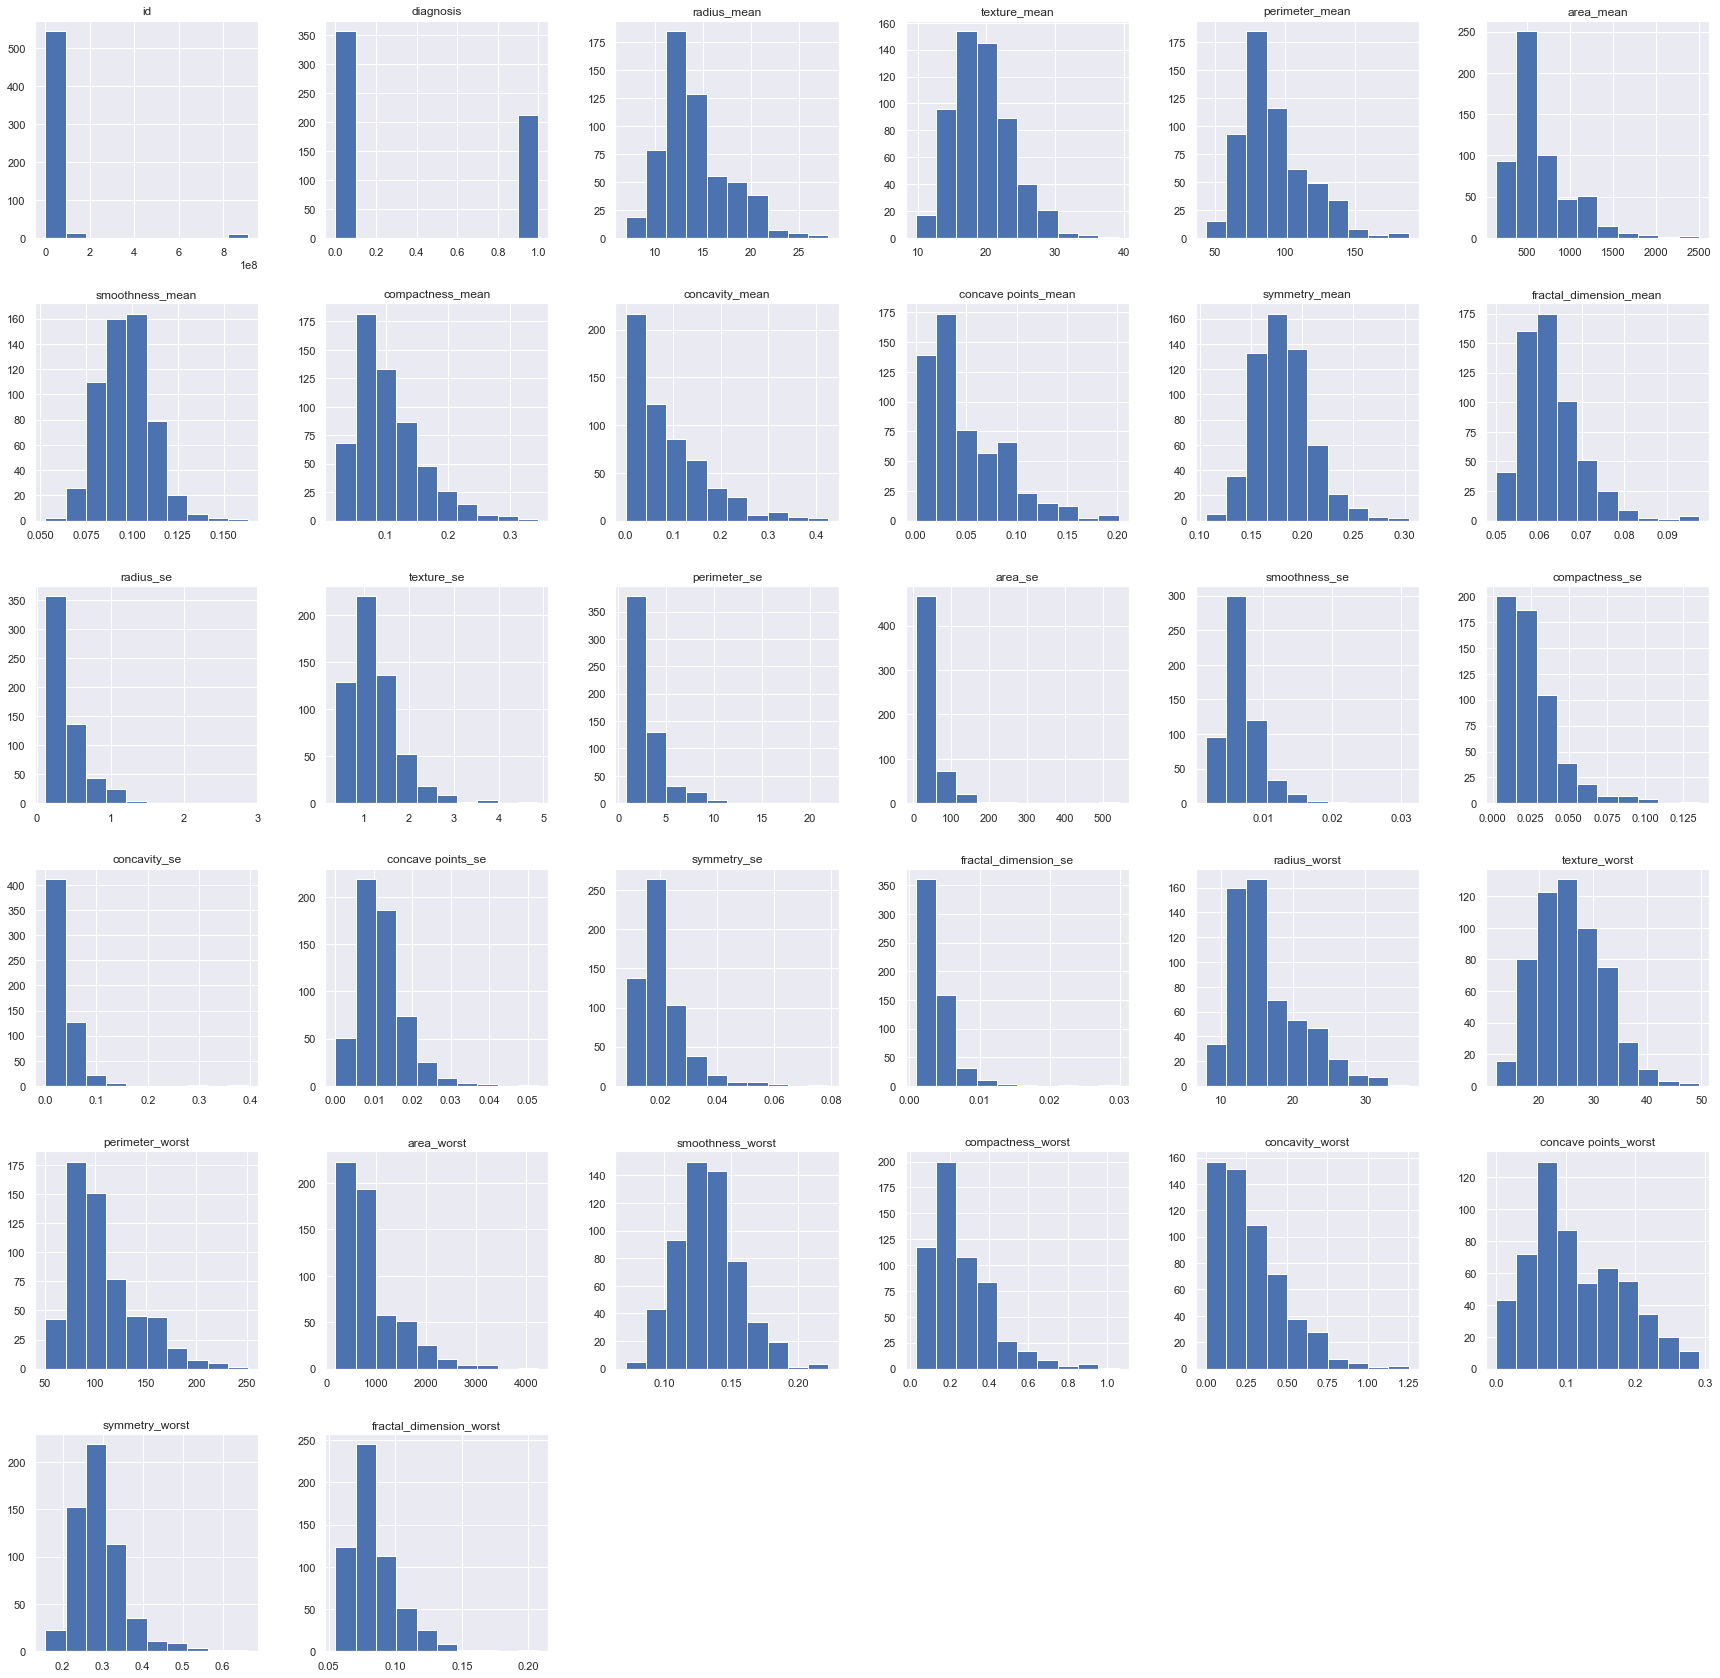

In [11]:
d=df.hist(figsize=(30,30))

In [12]:
df_copy['concavity_mean'].fillna(df_copy['concavity_mean'].mean(), inplace=True)
df_copy['concave points_mean'].fillna(df_copy['concave points_mean'].mean(), inplace=True)
df_copy['concavity_se'].fillna(df_copy['concavity_se'].mean(), inplace=True)
df_copy['concave points_se'].fillna(df_copy['concave points_se'].mean(), inplace=True)
df_copy['concavity_worst'].fillna(df_copy['concavity_worst'].mean(), inplace=True)
df_copy['concave points_worst'].fillna(df_copy['concave points_worst'].mean(), inplace=True)

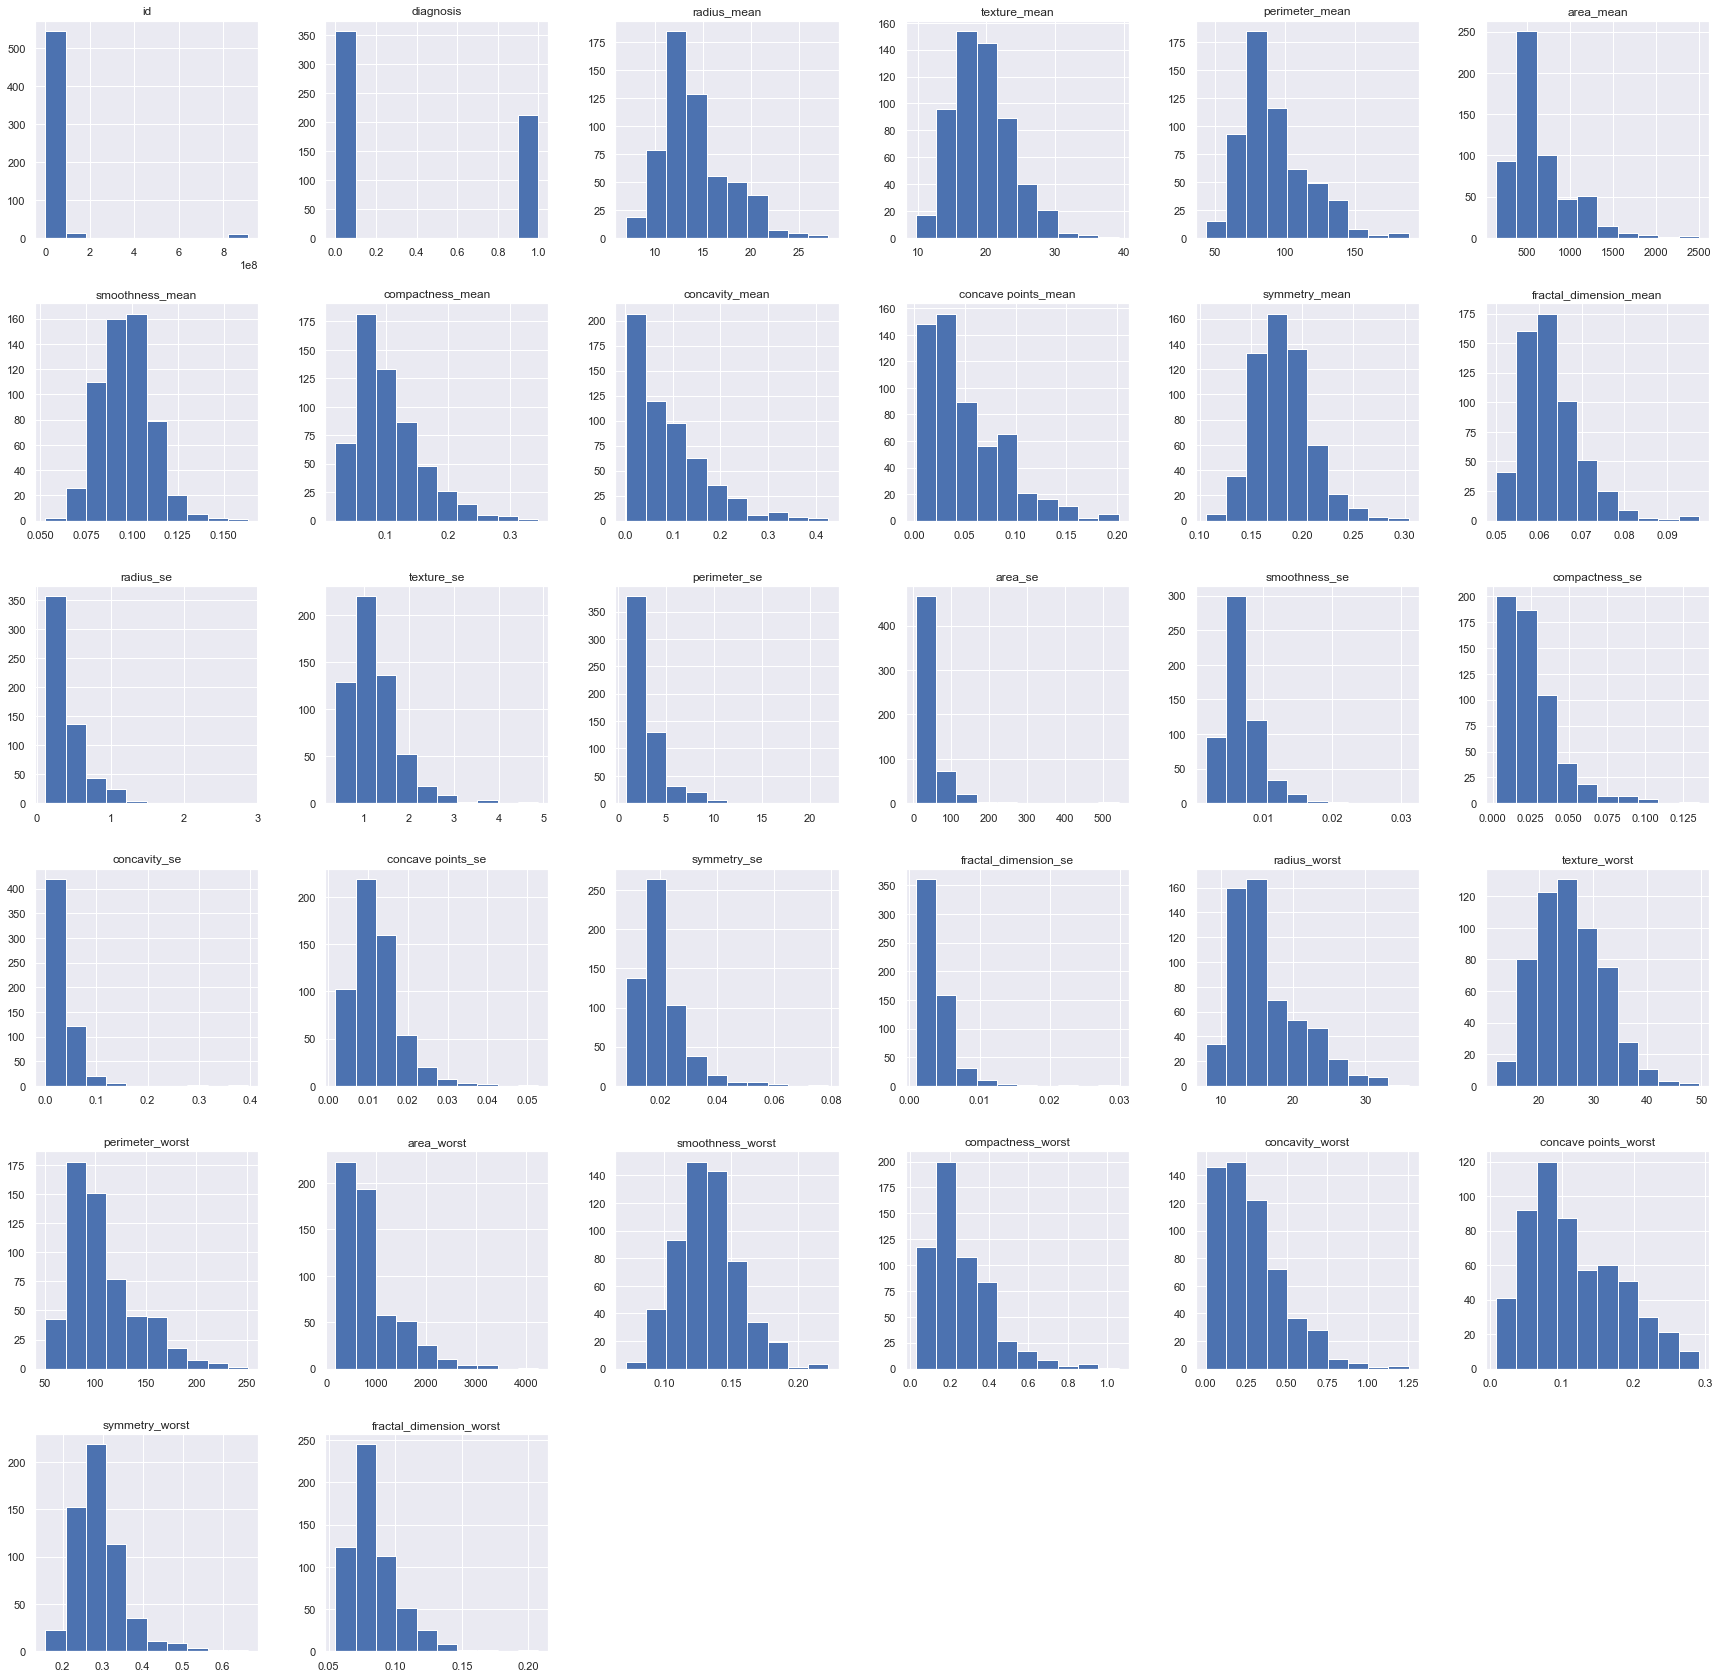

In [13]:
p=df_copy.hist(figsize=(30,30))

In [14]:
#p=sns.pairplot(df_copy, hue='diagnosis')

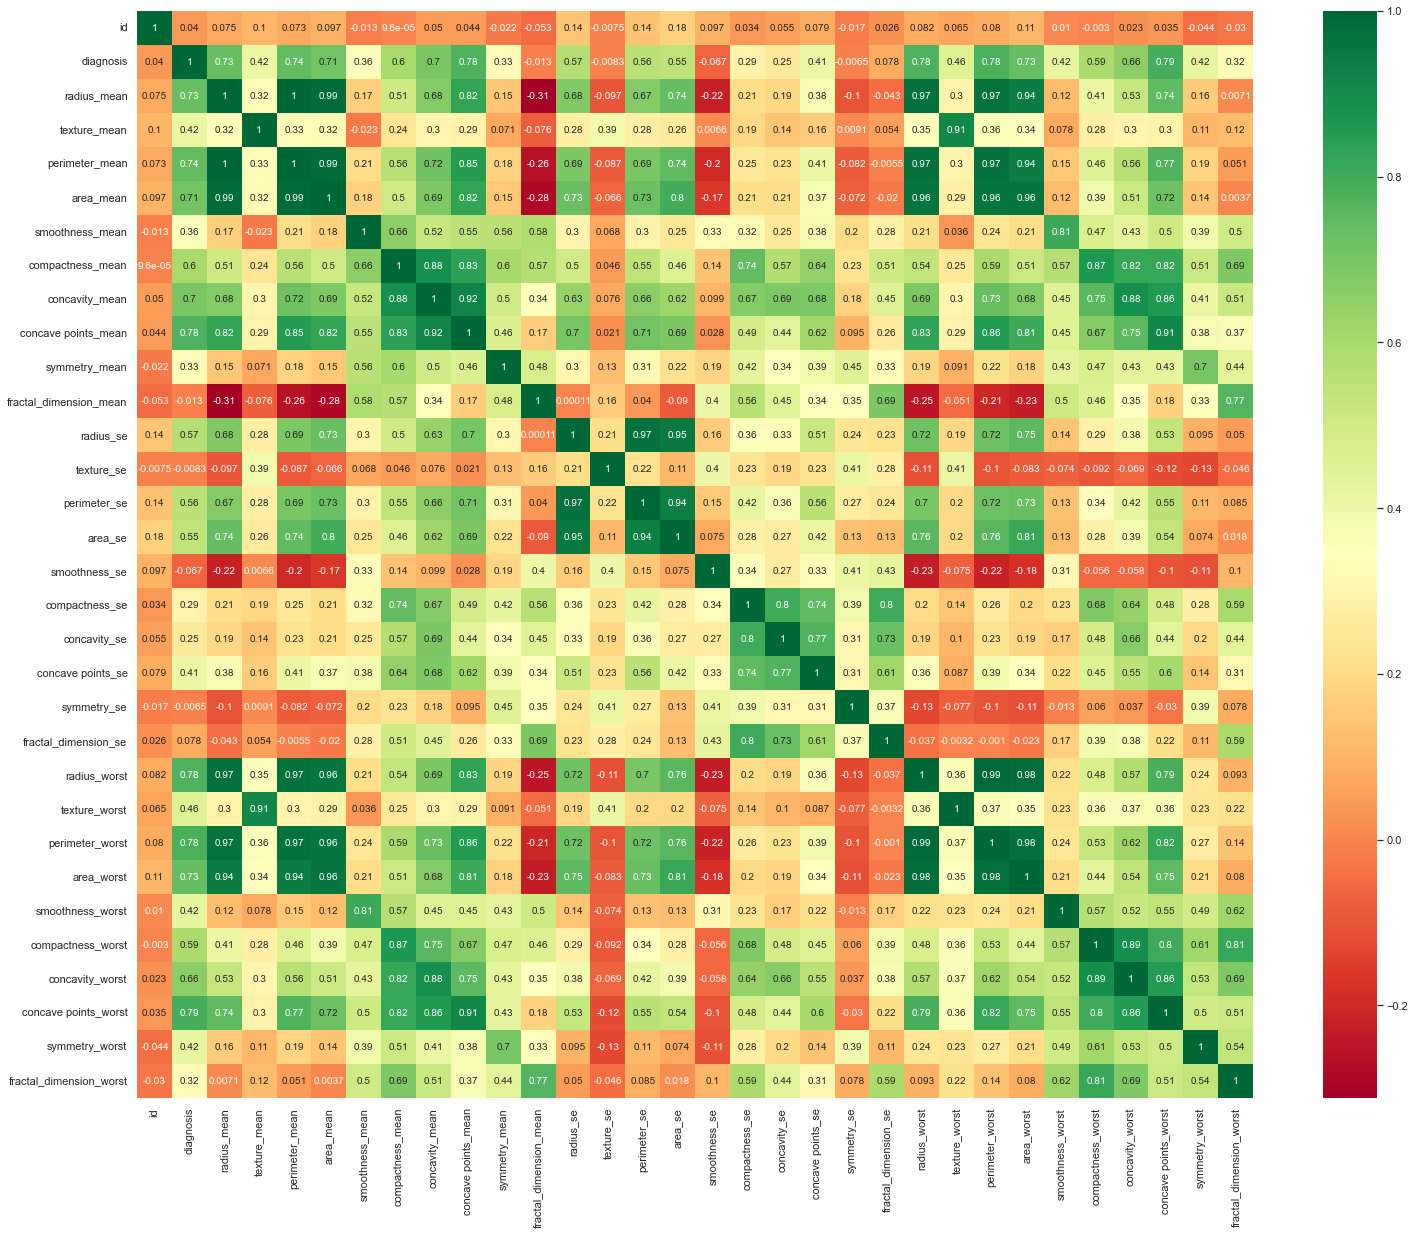

In [15]:
plt.figure(figsize=(25,20))
p=sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

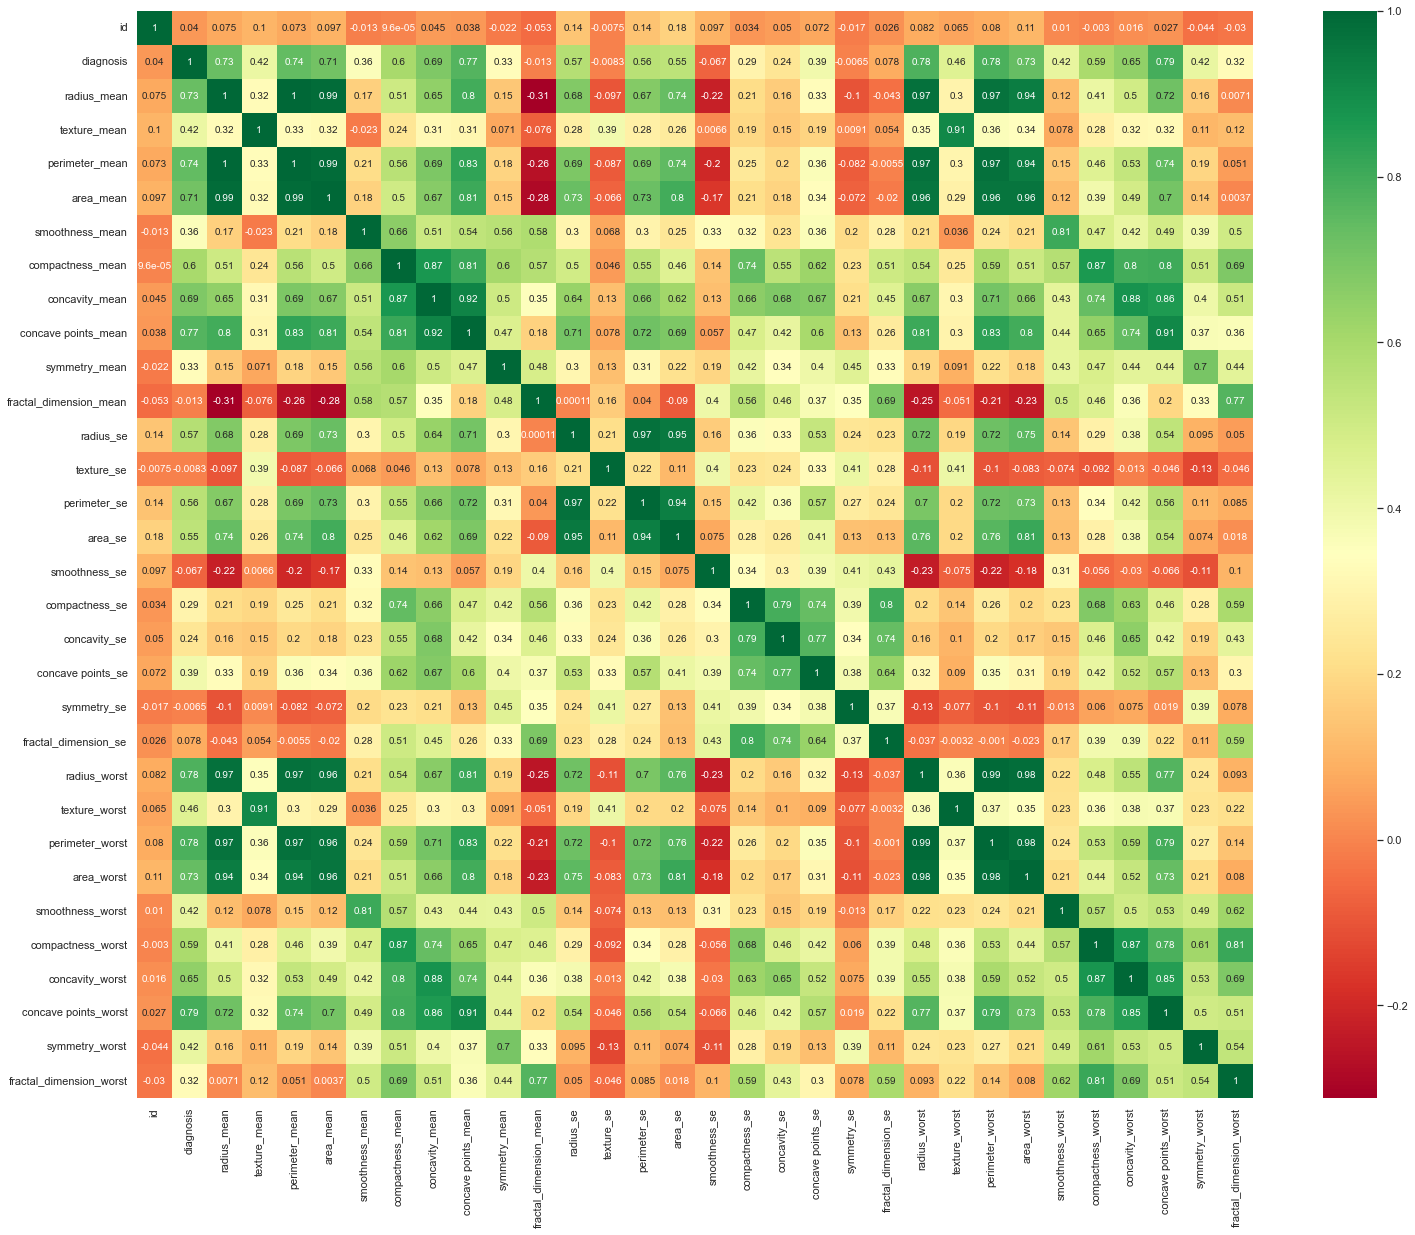

In [16]:
plt.figure(figsize=(25,20))
p=sns.heatmap(df_copy.corr(), annot=True, cmap='RdYlGn')

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df_copy.drop(['diagnosis'], axis=1),), columns=['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','texture_worst','perimeter_worst','texture_worst','radius_worst','concave points_se','concavity_se','compactness_se','area_se','perimeter_se','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean','fractal_dimension_se','symmetry_se','smoothness_se','texture_se','fractal_dimension_mean','diagnosis'])

In [18]:
X.head()

,fractal_dimension_worst,symmetry_worst,concave points_worst,concavity_worst,compactness_worst,smoothness_worst,area_worst,texture_worst,perimeter_worst,texture_worst,...,area_mean,perimeter_mean,texture_mean,radius_mean,fractal_dimension_se,symmetry_se,smoothness_se,texture_se,fractal_dimension_mean,diagnosis
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.665829,2.550904,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.121721,2.340123,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.050655,0.528573,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.180924,1.085646,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.357279,2.046176,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.841385,1.986215,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.917904,1.449440,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.999318,2.215307,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.364924,1.425781,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.594621,0.714359,-0.868353,-0.397100


In [19]:
X=X.drop(['diagnosis','symmetry_se','smoothness_se','texture_se','fractal_dimension_mean','fractal_dimension_se'], axis=1)

In [20]:
X.head()

,fractal_dimension_worst,symmetry_worst,concave points_worst,concavity_worst,compactness_worst,smoothness_worst,area_worst,texture_worst,perimeter_worst,texture_worst,...,perimeter_se,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.665829,2.550904,2.217515,...,-0.214002,1.316862,0.708626,0.644275,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.050655,0.528573,0.001392,...,-0.605351,-0.692926,-0.471714,0.225282,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.357279,2.046176,0.939685,...,-0.297005,0.814974,0.190863,1.443245,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.917904,1.449440,2.867383,...,0.689702,2.744280,0.805392,1.119247,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.364924,1.425781,-0.009560,...,1.483067,-0.048520,0.814464,1.149781,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724


In [21]:
y=df_copy.diagnosis

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

test_score=[]
train_score=[]

for i in range(1,20):
    
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    test_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))

In [25]:
max_train_score = max(train_score)
train_scores_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [26]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.84210526315789 % and k = [3]


# Liner Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [28]:
lg=LogisticRegression()
rfe=RFE(lg,25)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [29]:
rfe.score(X_test,y_test)

0.9473684210526315

optimal number of features: 14
Selected feauters: ['smoothness_worst', 'texture_worst', 'perimeter_worst', 'texture_worst', 'concave points_se', 'concavity_se', 'compactness_se', 'area_se', 'symmetry_mean', 'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean', 'radius_mean']


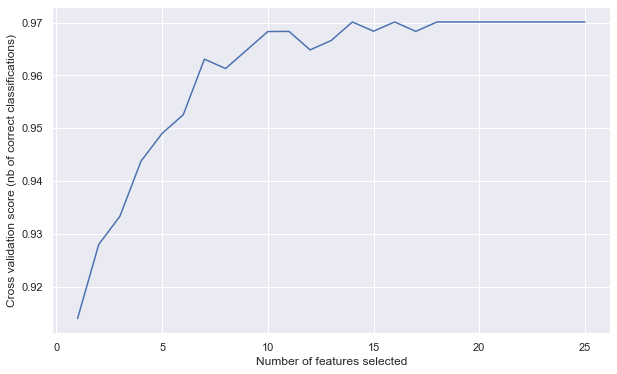

In [30]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)
print("optimal number of features: %d" % rfecv.n_features_)
print("Selected feauters: %s" %list(X.columns[rfecv.support_]))
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

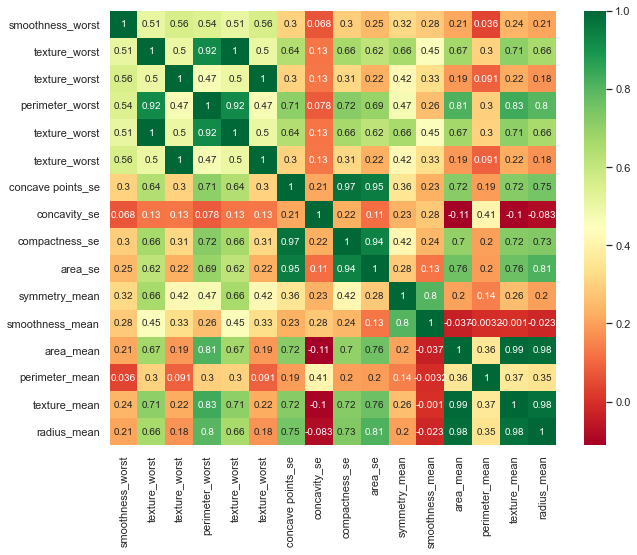

In [31]:
selected_features=['smoothness_worst', 'texture_worst', 'perimeter_worst', 'texture_worst', 'concave points_se', 'concavity_se', 'compactness_se', 'area_se', 'symmetry_mean', 'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean', 'radius_mean']
X_lg=X[selected_features]

plt.subplots(figsize=(10,8))
sns.heatmap(X_lg.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegressionaccuracy is 0.965
LogisticRegressionlog_loss is 0.081
LogisticRegressionauc is 0.995


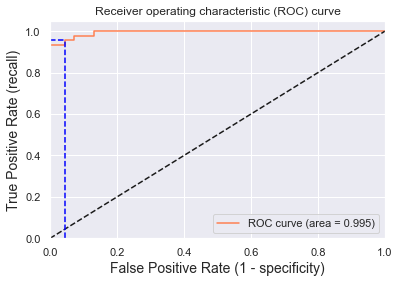

using a threshold of 0.345 guarantees a sensetivity of 0.956 and a spesificity of 0.957, i.e. a false positive rate of 4.35%.


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train, X_test, y_train, y_test=train_test_split(X_lg,y,test_size=0.2, random_state=2)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lg=logreg.predict(X_test)
y_pred_proba_lg=logreg.predict_proba(X_test)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba_lg)
print("Train/Test split results:")
print(logreg.__class__.__name__+'accuracy is %2.3f'%accuracy_score(y_test,y_pred_lg))
print(logreg.__class__.__name__+'log_loss is %2.3f'%log_loss(y_test,y_pred_proba_lg))
print(logreg.__class__.__name__+'auc is %2.3f'%auc(fpr,tpr))

idx=np.min(np.where(tpr>0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print('using a threshold of %.3f ' %thr[idx]+'guarantees a sensetivity of %.3f '%tpr[idx]+'and a spesificity of %.3f'%(1-fpr[idx])+', i.e. a false positive rate of %.2f%%.'%(np.array(fpr[idx])*100))

In [35]:
import numpy as np 
#import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
#from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

In [43]:
svm=SVC(gamma='auto', kernel='linear')
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
precision=metrics.accuracy_score(y_pred_svm,y_test)*100
print('accuracy SVN: {0:.2f}%'.format(precision))

accuracy SVN: 96.49%
